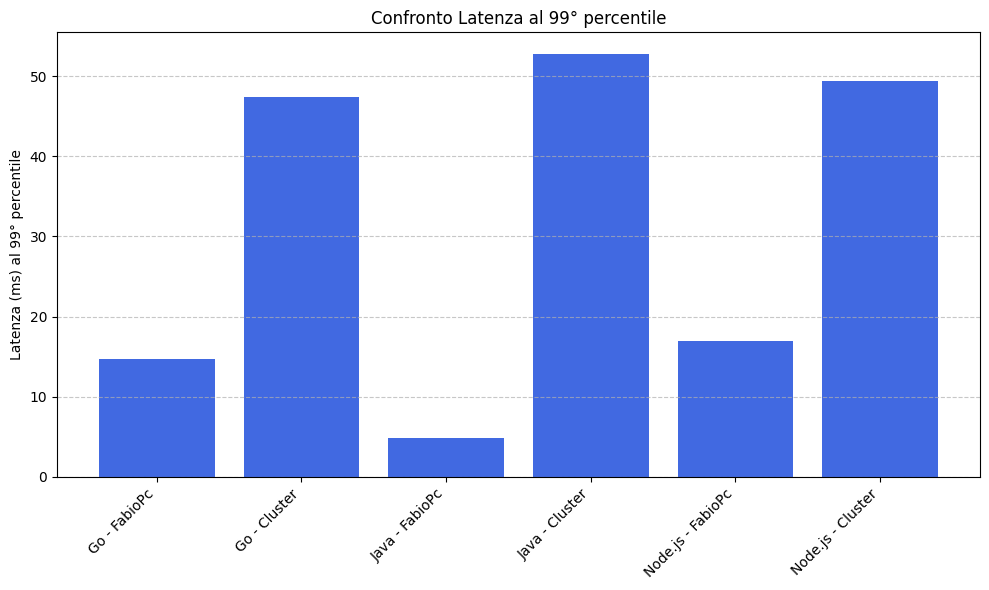

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dei CSV
df_go_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/goFolder/latency_go_minio_endLatency_100_FabioPc.csv', sep=';', index_col=0)
df_java_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/javaFolder/latency_javaQuarkus_minio_endLatency_500_FabioPc.csv', sep=';', index_col=0)
df_node_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/nodejsFolder/latency_js_minio_endLatency_100_FabioPc.csv', sep=';', index_col=0)
df_go_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/go/latency_go_minio_endLatency_500_Cluster.csv', sep=';', index_col=0)
df_node_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/node/latency_node_minio_endLatency_500_Cluster.csv', sep=';', index_col=0)
df_java_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/quarkus/latency_quarkus_minio_endLatency_500_Cluster.csv', sep=';', index_col=0)

# Rimuove la prima riga, che probabilmente contiene intestazioni duplicate
df_go_fabiopc = df_go_fabiopc.iloc[1:]
df_java_fabiopc = df_java_fabiopc.iloc[1:]
df_node_fabiopc = df_node_fabiopc.iloc[1:]
df_go_cluster = df_go_cluster.iloc[1:]
df_node_cluster = df_node_cluster.iloc[1:]
df_java_cluster = df_java_cluster.iloc[1:]

# Rimuovi eventuali spazi dai nomi delle colonne (pulizia)
for df in [df_go_fabiopc, df_java_fabiopc, df_node_fabiopc, df_go_cluster, df_node_cluster, df_java_cluster]:
    df.columns = df.columns.str.strip()

# Calcolo del 99° percentile della colonna latency_ms
percentiles_99 = {
    'Go - FabioPc': df_go_fabiopc['latency_ms'].astype(float).quantile(0.99),
    'Go - Cluster': df_go_cluster['latency_ms'].astype(float).quantile(0.99),
    'Java - FabioPc': df_java_fabiopc['latency_ms'].astype(float).quantile(0.99),
    'Java - Cluster': df_java_cluster['latency_ms'].astype(float).quantile(0.99),
    'Node.js - FabioPc': df_node_fabiopc['latency_ms'].astype(float).quantile(0.99),
    'Node.js - Cluster': df_node_cluster['latency_ms'].astype(float).quantile(0.99)
}

# Plot a barre
plt.figure(figsize=(10,6))
plt.bar(percentiles_99.keys(), percentiles_99.values(), color='royalblue')
plt.ylabel('Latenza (ms) al 99° percentile')
plt.title('Confronto Latenza al 99° percentile')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
